In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,f1_score,classification_report,recall_score
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [57]:
df0 = pd.read_csv("data.csv")

In [58]:
df0.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [59]:
df = df0.copy()

In [60]:
df.rename(columns={"Hardness":"Sertlik","Solids":"Toplam Çözünmüş Katı Madde","Chloramines":"Kloramin","Sulfate":"Sülfat","Conductivity":"Elektriksel İletkenlik","Organic_carbon":"Organik Karbon","Trihalomethanes":"Trihalometanlar","Turbidity":"Bulanıklık","Potability":"İçilebilirlik"},inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Sertlik,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Toplam Çözünmüş Katı Madde,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Kloramin,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sülfat,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Elektriksel İletkenlik,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organik Karbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalometanlar,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Bulanıklık,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
İçilebilirlik,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df["İçilebilirlik"].value_counts()

İçilebilirlik
0    1998
1    1278
Name: count, dtype: int64

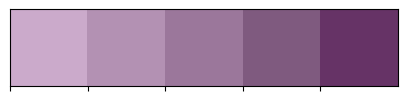

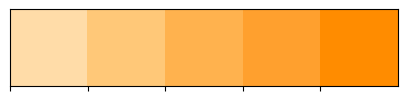

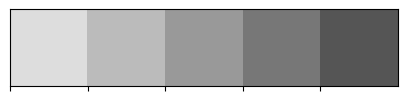

In [8]:
# Renk Paletim
colors_purple = ['#CBAACB', '#B391B3', '#9B779B', '#7F5A7F', '#663366']
colors_orange = ['#FFDCA8', '#FFC878', '#FFB24E', '#FFA02E', '#FF8C00']
colors_gray = ['#DDDDDD', '#BBBBBB', '#999999', '#777777', '#555555']
sns.palplot(colors_purple)
sns.palplot(colors_orange)
sns.palplot(colors_gray)

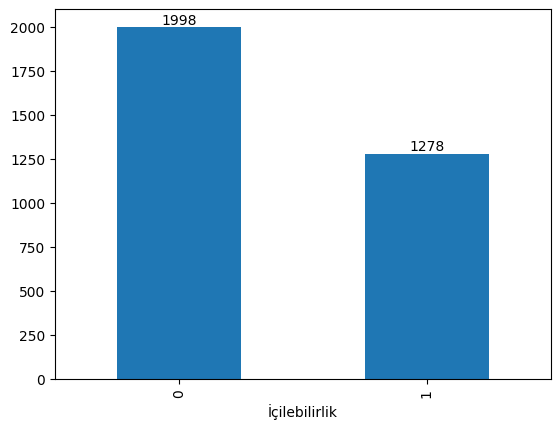

In [9]:
ax = df.İçilebilirlik.value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

Elimdeki Data Setindeki Kaç tane su örneği içilebilir?
Bunu öğrenmek için bir pasta grafiği oluşturmak istedim.

In [10]:
d= pd.DataFrame(df['İçilebilirlik'].value_counts()).reset_index()
d['İçilebilirlik'] = d['İçilebilirlik'].astype(str)
d['İçilebilirlik'] = d['İçilebilirlik'].map({'0': 'İçilemez', '1': 'İçilebilir'})

fig = px.pie(d, values='count', names='İçilebilirlik', hole=0.6, opacity=0.6,
             color_discrete_sequence=['#FF5733', '#3399FF'],
             labels={'İçilebilirlik':'İçilebilirlik', 'count':'Örnek Sayısı'})

fig.add_annotation(text='İçilebilirlik',
                   x=0.5, y=0.5, showarrow=False, font_size=20, opacity=0.7, font_family='poppins')

fig.update_layout(
    font_family='poppins',
    title=dict(text='Kaç tane su örneği içilebilir?', x=0.5, y=0.94,
               font=dict(color=colors_gray[2], size=25)),
    legend=dict(x=0.37, y=-0.05, orientation='h', traceorder='reversed'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

**Sertlik**, içilebilirlik açısından doğrudan bir sağlık riski oluşturmaz. Ancak sert suyun içindeki yüksek mineral içeriği, sabun ve deterjanların etkinliğini azaltabilir. Bu durumda, daha fazla sabun veya deterjan kullanımı gerekebilir ve cilt veya saç kuruluğuna neden olabilir. Ayrıca, sert suyun tadı ve kokusu bazı insanlar için rahatsız edici olabilir. Bu sebeplerden dolayı, suyun sertliği kullanım kolaylığı ve konfor açısından önemli bir faktördür.

In [11]:
fig = px.histogram(df, x='Sertlik',y = Counter(df['Sertlik']), color='İçilebilirlik',
                   template='plotly_white', marginal='box', opacity=0.7,
                   nbins=100, color_discrete_sequence=['purple', 'orange'],
                   barmode='group', histfunc='count')

fig.add_vline(x=151, line_width=1, line_color='black', line_dash='dot', opacity=0.7)
fig.add_vline(x=301, line_width=1, line_color='black', line_dash='dot', opacity=0.7)
fig.add_vline(x=76, line_width=1, line_color='black', line_dash='dot', opacity=0.7)

fig.add_annotation(text='<76 mg/L yumuşak<br>olarak kabul edilir', x=45, y=130, showarrow=False, font_size=15)
fig.add_annotation(text='76 ile 150 mg/L arası<br>orta sert', x=118, y=130, showarrow=False, font_size=15)
fig.add_annotation(text='151 ile 300 mg/L arası<br>sert olarak kabul edilir', x=255, y=130, showarrow=False, font_size=15)
fig.add_annotation(text='>300 mg/L çok sert<br>olarak kabul edilir', x=345, y=130, showarrow=False, font_size=15)

fig.update_layout(
    font_family='poppins',
    title=dict(text='Sertlik Dağılımı', x=0.5, y=0.95, font_size=22),
    xaxis_title_text='Sertlik (mg/L)',
    yaxis_title_text='Sayı',
    legend=dict(x=1, y=0.96, bordercolor='black', borderwidth=0, tracegroupgap=5),
    bargap=0.3,
    height=600,  
    width=1600
)

fig.show()

**pH**, suyun asitlik veya bazlık derecesini ölçen bir parametredir. pH değeri 0 ile 14 arasında ölçülür, 7 nötr bir pH değerini temsil eder (su). pH değeri 7'den küçükse asidik, 7'den büyükse bazik olarak kabul edilir.

pH seviyesi suyun içilebilirliğini doğrudan etkileyebilir. Genel olarak, içme suyu için en uygun pH aralığı 6.5 ile 8.5 arasındadır. Bu pH aralığında, su tüketimi genellikle insan sağlığı için güvenlidir. Ancak, pH değeri bu aralığın dışında ise bazı olumsuz etkiler görülebilir:

Düşük pH (Asidik Su): Su çok düşük bir pH değerine sahipse (örneğin, asit yağmuru nedeniyle), metal boruları veya su depolarını aşındırabilir. Ayrıca, içindeki metallerin suda çözünmesine neden olabilir, bu da suyun içilebilirliğini azaltabilir.

Yüksek pH (Bazik Su): Su çok yüksek bir pH değerine sahipse, tadı kötü olabilir ve bazı insanlar için içimi zor olabilir. Ayrıca, yüksek pH, suyun içinde çözünmüş minerallerin çökelmesine neden olabilir, bu da suyun kalitesini etkileyebilir.

Bu nedenle, içme suyunun pH değeri, hem tüketim kalitesi hem de tesisat sistemlerinin korunması açısından önemli bir parametredir. pH seviyesinin belirli aralıklarda tutulması, suyun güvenli ve sağlıklı olmasını sağlamak için önemlidir.

In [12]:
fig = px.histogram(df,x='ph',y=Counter(df['ph']),color='İçilebilirlik',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_purple[3],colors_orange[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color=colors_gray[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 Asidik', x=4, y=70, showarrow=False, font_size=14)
fig.add_annotation(text='>7 Bazik', x=10, y=70, showarrow=False, font_size=14)

fig.update_layout(
    font_family='poppins',
    title=dict(text='pH Seviye Dağılımı', x=0.5, y=0.95, font=dict(color='black', size=22)),
    xaxis_title_text='pH Seviyesi',
    yaxis_title_text='Sayı',
    legend=dict(x=1, y=0.96, bordercolor='black', borderwidth=0, tracegroupgap=5),
    bargap=0.3,
    height=600,
    width=1600
)
fig.show()

**Toplam çözünmüş katı madde (solids)**, suyun içilebilirliğini etkileyen bir faktördür çünkü yüksek konsantrasyonlarda suyun tadı, kokusu ve sağlık riskleri üzerinde olumsuz etkileri olabilir.

In [13]:
fig = px.histogram(df,x='Toplam Çözünmüş Katı Madde',y=Counter(df['Toplam Çözünmüş Katı Madde']),color='İçilebilirlik',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_purple[3],colors_orange[3]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='poppins',
    title=dict(text='Toplam Çözünmüş Katı Madde Dağılımı', x=0.5, y=0.95, font=dict(color='black', size=22)),
    xaxis_title_text='Çözünmüş Katılar (ppm)',
    yaxis_title_text='Sayı',
    legend=dict(x=1, y=0.96, bordercolor='black', borderwidth=0, tracegroupgap=5),
    bargap=0.3,
    height=600,
    width=1500
)
fig.show()

**Kloramin,** su arıtma işlemlerinde kullanılan bir dezenfektan maddedir. Kloramin, mikroorganizmaları öldürmek için suya klor eklenerek oluşturulan bir bileşiktir. İçilebilirlik açısından, suyun kloramin seviyeleri kontrol altında tutulmalıdır çünkü aşırı kloramin içeren su, kötü tat ve koku oluşturabilir ve uzun süreli tüketimde sağlık sorunlarına neden olabilir.

In [14]:
fig = px.histogram(df,x='Kloramin',y=Counter(df['Kloramin']),color='İçilebilirlik',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_purple[3],colors_orange[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=4, line_width=1, line_color=colors_gray[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<4 ppm içme suyu için<br> güvenli kabul edilir', x=1.8, y=90,font=dict(size=14), showarrow=False)

fig.update_layout(
    font_family='poppins',
    title=dict(text='Kloramin Dağılımı', x=0.50, y=0.95,
               font=dict(color = colors_gray[2], size=22)),
    xaxis_title_text='Kloramin (ppm)',
    yaxis_title_text='Sayı',
    legend=dict(x=1, y=0.96, bordercolor='#555555', borderwidth=0, tracegroupgap=5),
    bargap=0.3,
    height=600,
    width=1500
)
fig.show()

**Sülfatlar,** suyun içinde bulunan doğal minerallerdir ve genellikle kalsiyum sülfat (kireç taşı) veya magnezyum sülfat (Epsom tuzu) formunda bulunurlar. İçilebilirlik açısından, suyun sülfat içeriği belirli sınırlar içinde olmalıdır. Yüksek sülfat seviyeleri, suyun tadını ve kokusunu olumsuz yönde etkileyebilir. Ayrıca, bazı kişilerde sindirim sorunlarına neden olabilir. Sağlık için genellikle kabul edilebilir sınırlar içinde olduğunda, suyun sülfat içeriği genellikle endişe verici değildir.

In [15]:
fig = px.histogram(df,x='Sülfat',y=Counter(df['Sülfat']),color='İçilebilirlik',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_purple[3],colors_orange[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors_gray[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L içme suyu için<br> güvenli kabul edilir', x=175, y=90, font= (dict(size=14)),showarrow=False)

fig.update_layout(
    font_family='poppins',
    title=dict(text='Sülfat Dağılımı',x=0.50,y=0.95,
               font=dict(color=colors_gray[2],size=20)),
    xaxis_title_text='Sülfat (mg/L)',
    yaxis_title_text='Sayı',
    legend=dict(x=1,y=0.96,bordercolor=colors_gray[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
    height=600,
    width=1500
)
fig.show()

**Elektriksel iletkenlik,** suyun içinde bulunan minerallerin ve tuzların elektrik akımını taşıma kapasitesidir. İçilebilirlik açısından, yüksek iletkenlik genellikle suyun tadını veya kokusunu etkileyebilir, ancak belirli standartlara göre düşük seviyelerde olması tercih edilir.

In [16]:
fig = px.histogram(df,x='Elektriksel İletkenlik',y=Counter(df['Elektriksel İletkenlik']),color='İçilebilirlik',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_purple[3],colors_orange[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='İletkenlik aralığı <br> hem İçilebilir hem de İçilemez su için güvenlidir <br> (200-800)',
                   x=600, y=90, font=dict(size=14), showarrow=False)

fig.update_layout(
    font_family='poppins',
    title=dict(text='İletkenlik Dağılımı',x=0.5,y=0.95,
               font=dict(color=colors_gray[2],size=22)),
    xaxis_title_text='İletkenlik (μS/cm)',
    yaxis_title_text='Sayı',
    legend=dict(x=1,y=0.96,bordercolor=colors_gray[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
    height=600,
    width=1500
)
fig.show()

**Organik Karbon,** sudaki doğal ve insan kaynaklı organik maddelerin karbon içeriğini ifade eder. İçilebilirlik açısından, yüksek organik karbon seviyeleri suyun renk, koku ve tadını olumsuz yönde etkileyebilir. Ayrıca, organik maddeler suyun arıtılması ve dezenfeksiyonu süreçlerini zorlaştırabilir, bu da içilebilirlik standartlarına uygunluğu olumsuz etkileyebilir.

In [17]:
fig = px.histogram(df,x='Organik Karbon',y=Counter(df['Organik Karbon']),color='İçilebilirlik',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_purple[3],colors_orange[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=10, line_width=1, line_color=colors_gray[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Tipik Organik Karbon<br> seviyesi 10 ppm\'ye kadar', x=5.3, y=110, font=dict(size=14), showarrow=False)

fig.update_layout(
    font_family='poppins',
    title=dict(text='Organik Karbon Dağılımı', x=0.5, y=0.95,
               font=dict(color=colors_gray[2], size=20)),
    xaxis_title_text='Organik Karbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_gray[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
    height=600,
    width=1600
)
fig.show()

**Trihalometanlar,** suyun klorlanması sırasında organik maddelerle reaksiyona girerek oluşan kimyasal bileşiklerdir. Yüksek seviyelerde THM, kanserojen etkilere sahip olabilir ve suyun içilebilirliğini olumsuz yönde etkileyebilir. Bu nedenle, THM seviyeleri suyun güvenliği açısından düzenli olarak izlenmeli ve kontrol edilmelidir.

In [18]:
fig = px.histogram(df,x='Trihalometanlar',y=Counter(df['Trihalometanlar']),color='İçilebilirlik',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_purple[3],colors_orange[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=80, line_width=1, line_color=colors_gray[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Trihalometanlar için üst sınır<br> 80 μg/L', x=115, y=90, font=dict(size=14), showarrow=False)

fig.update_layout(
    font_family='poppins',
    title=dict(text='Trihalometanlar Dağılımı', x=0.5, y=0.95,
               font=dict(color=colors_gray[2], size=20)),
    xaxis_title_text='Trihalometanlar (μg/L)',
    yaxis_title_text='Sayı',
    legend=dict(x=1, y=0.96, bordercolor=colors_gray[4], borderwidth=0, tracegroupgap=5),
    bargap=0.3,
    height=600,
    width=1600
)
fig.show()

In [19]:
fig = px.histogram(df,x='Bulanıklık',y=Counter(df['Bulanıklık']),color='İçilebilirlik',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_purple[3],colors_orange[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color=colors_gray[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<5 NTU Bulanıklık güvenli<br> kabul edilir', x=6, y=90, font=dict(size=14), showarrow=False)

fig.update_layout(
    font_family='poppins',
    title=dict(text='Bulanıklık Dağılımı', x=0.5, y=0.95,
               font=dict(color=colors_gray[2], size=20)),
    xaxis_title_text='Bulanıklık (NTU)',
    yaxis_title_text='Sayı',
    legend=dict(x=1, y=0.96, bordercolor=colors_gray[4], borderwidth=0, tracegroupgap=5),
    bargap=0.3,
    height=600,
    width=1600
)
fig.show()

## *Makine Öğrenmesi Modelleri*

In [20]:
# Veri setimizde boş değer var mı?

In [21]:
df.isnull().sum()

ph                            491
Sertlik                         0
Toplam Çözünmüş Katı Madde      0
Kloramin                        0
Sülfat                        781
Elektriksel İletkenlik          0
Organik Karbon                  0
Trihalometanlar               162
Bulanıklık                      0
İçilebilirlik                   0
dtype: int64

In [22]:
# Bu boş değerleri özelliklerinin grafiklerine göre nasıl doldurabiliriz bakalım?

In [23]:
# Bağımlı değişkenimiz İçilebilirlik olacaktır.
# Bağımlı değişkenimizi etkileyen özelliklerin grafiklerini inceleyelim.

In [24]:
correlation_matrix = df.corr()

In [25]:
correlation_with_label = correlation_matrix['İçilebilirlik'].drop('İçilebilirlik')

In [26]:
print(correlation_with_label)

ph                           -0.003556
Sertlik                      -0.013837
Toplam Çözünmüş Katı Madde    0.033743
Kloramin                      0.023779
Sülfat                       -0.023577
Elektriksel İletkenlik       -0.008128
Organik Karbon               -0.030001
Trihalometanlar               0.007130
Bulanıklık                    0.001581
Name: İçilebilirlik, dtype: float64


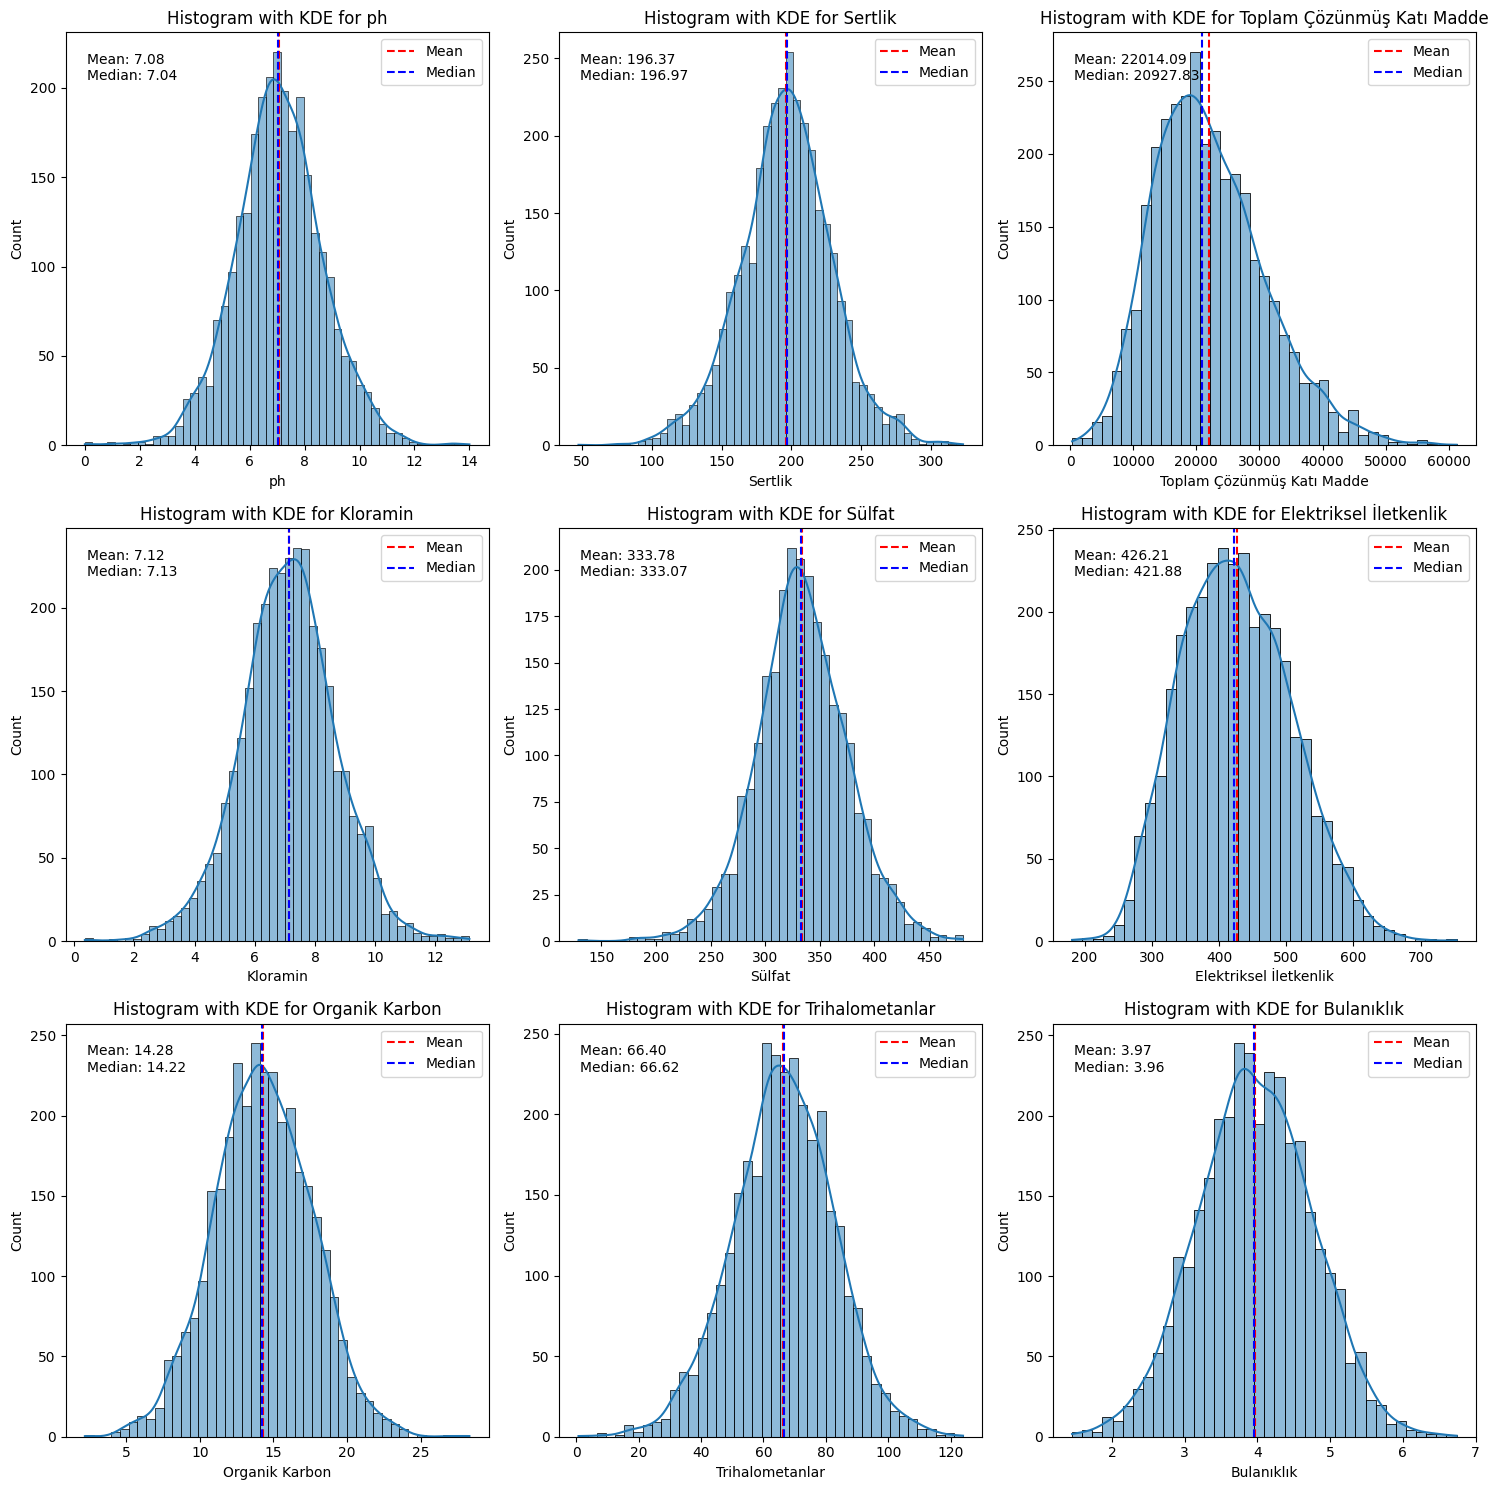

In [27]:
variables = ['ph', 'Sertlik', 'Toplam Çözünmüş Katı Madde', 'Kloramin', 'Sülfat', 'Elektriksel İletkenlik',
             'Organik Karbon', 'Trihalometanlar', 'Bulanıklık']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    sns.histplot(df[var], kde=True, ax=ax)  
    ax.axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[var].median(), color='blue', linestyle='--', label='Median')
    ax.annotate(f'Mean: {df[var].mean():.2f}\nMedian: {df[var].median():.2f}',
                xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
    
    ax.set_title(f'Histogram with KDE for {var}')
    ax.set_xlabel(var)
    ax.legend()

plt.tight_layout()
plt.show()

In [61]:
df["ph"].fillna(df["ph"].mean(),inplace=True)
df["Trihalometanlar"].fillna(df["Trihalometanlar"].mean(),inplace=True)
df["Sülfat"].fillna(df["Sülfat"].mean(),inplace=True)

C:\Users\excal\AppData\Local\Temp\ipykernel_13588\2622272124.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\excal\AppData\Local\Temp\ipykernel_13588\2622272124.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [66]:
x = df.drop('İçilebilirlik', axis=1)
y = df['İçilebilirlik']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Linear Regression

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2) 

Mean Squared Error (MSE): 0.2336657140811714
R^2 Score: -0.0002662813826492805


## Decision Tree (Karar Ağaçları)

In [31]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.5777439024390244
Confusion Matrix:
 [[255 157]
 [120 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656



## Support Vector Machines (Destek Vektör Makineleri)

In [32]:
model = SVC(kernel='linear', random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.6189024390243902
Confusion Matrix:
 [[403   9]
 [241   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.98      0.76       412
           1       0.25      0.01      0.02       244

    accuracy                           0.62       656
   macro avg       0.44      0.50      0.39       656
weighted avg       0.49      0.62      0.49       656



In [33]:
svm= SVC()
svm_params = {"C": (0.2,1,5,10),
              "gamma":(0.001, 0.01, 0.1),
              "kernel":["linear","rbf"]}
svm_cv = GridSearchCV(svm,svm_params,n_jobs=-1, cv=5, verbose=1, scoring="accuracy")


In [34]:
svm_cv.fit(x_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best params: {'C': 0.2, 'gamma': 0.001, 'kernel': 'rbf'}


In [35]:
svm_tuned = SVC(**best_params).fit(x_train,y_train)
y_pred_tuned = svm_tuned.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_tuned)
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
report = classification_report(y_test, y_pred_tuned)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy: 0.6280487804878049
Confusion Matrix:
 [[412   0]
 [244   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## K-Nearest Neighbors (K-En Yakın Komşu)

In [36]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [37]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [38]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 59.60365853658537 % and k = [14]


In [39]:
model = KNeighborsClassifier(n_neighbors=14)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.5960365853658537
Confusion Matrix:
 [[364  48]
 [217  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.88      0.73       412
           1       0.36      0.11      0.17       244

    accuracy                           0.60       656
   macro avg       0.49      0.50      0.45       656
weighted avg       0.53      0.60      0.52       656



## Random Forest

In [40]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.6920731707317073
Confusion Matrix:
 [[370  42]
 [160  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79       412
           1       0.67      0.34      0.45       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.69      0.69      0.66       656



In [41]:
n_estimators = [500, 900, 1100, 1500] 
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]  
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(x_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1039 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1100}


In [42]:
random_forest_tuned = RandomForestClassifier(**best_params)
random_forest_tuned.fit(x_train,y_train)
y_pred = random_forest_tuned.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.6890243902439024
Confusion Matrix:
 [[368  44]
 [160  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78       412
           1       0.66      0.34      0.45       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.68      0.69      0.66       656



## Gradient Boosting

In [43]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.6478658536585366
Confusion Matrix:
 [[322  90]
 [141 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74       412
           1       0.53      0.42      0.47       244

    accuracy                           0.65       656
   macro avg       0.61      0.60      0.60       656
weighted avg       0.64      0.65      0.64       656



## XGBoost

In [44]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Tahmin yap ve hata hesapla
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.6554878048780488
Confusion Matrix:
 [[327  85]
 [141 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74       412
           1       0.55      0.42      0.48       244

    accuracy                           0.66       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.66      0.64       656



In [45]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [46]:
xgboost_tuned = xgb.XGBClassifier(**best_params)
xgboost_tuned.fit(x_train,y_train)
y_pred = xgboost_tuned.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.6615853658536586
Confusion Matrix:
 [[349  63]
 [159  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76       412
           1       0.57      0.35      0.43       244

    accuracy                           0.66       656
   macro avg       0.63      0.60      0.60       656
weighted avg       0.65      0.66      0.64       656



## Lojistik Regresyon

In [47]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.6280487804878049
Confusion Matrix:
 [[412   0]
 [244   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## AdaBoost

In [48]:
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

c:\Users\excal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.6204268292682927
Confusion Matrix:
 [[360  52]
 [197  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.87      0.74       412
           1       0.47      0.19      0.27       244

    accuracy                           0.62       656
   macro avg       0.56      0.53      0.51       656
weighted avg       0.58      0.62      0.57       656

